# Import packages

In [1]:
import json
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import LinearSegmentedColormap
from mpl_toolkits.axes_grid1 import make_axes_locatable
import time
import datetime
import matplotlib.ticker as mticker

# Compute the speed

In [2]:
def compute_speed(record):
    timestamps = np.array(record['timestamp']) / 1000
    local_y_positions = np.array(record['local_y'])
    
    # 确保数据按时间排序
    sorted_indices = np.argsort(timestamps)
    timestamps = timestamps[sorted_indices]
    local_y_positions = local_y_positions[sorted_indices]

    timestamps += 9 * 3600
    
    # 计算速度
    speed = np.diff(local_y_positions) / np.diff(timestamps)
    speed = np.append(speed[0], speed)  # 保持速度数组与位置数组长度一致
    speed *= 0.681818  # 将单位从 ft/sec 转换为 mph
    
    return timestamps, local_y_positions, speed

# Plot function

In [3]:
def plot_trajectory(record, ax, cmap, cax, all_timestamps):
    timestamps, positions, speed = compute_speed(record)
    # 转换位置单位为米
    positions = positions * 0.3048
    # 绘制轨迹
    im = ax.scatter(timestamps, positions, c=speed, cmap=cmap, vmin=0, vmax=55, s=0.01)
    all_timestamps.extend(timestamps)
    return im

def setup_plot():
    plt.rc('font', family='serif', size=14)
    fig, ax = plt.subplots(figsize=(12, 4))
    divider = make_axes_locatable(ax)
    cax = divider.append_axes("right", size="3%", pad=0.05)

    # 定义颜色范围
    jet = plt.cm.jet
    colors = [jet(x) for x in np.linspace(1, 0.5, 256)]
    green_to_red = LinearSegmentedColormap.from_list('GreenToRed', colors, N=256)
    
    return fig, ax, green_to_red, cax

# Operating zone

Plotted 200 trajectories
Plotted 400 trajectories
Plotted 600 trajectories
Plotted 800 trajectories
Plotted 1000 trajectories
Plotted 1200 trajectories
Plotted 1400 trajectories
Plotted 1600 trajectories
Elapsed: 19.341384172439575


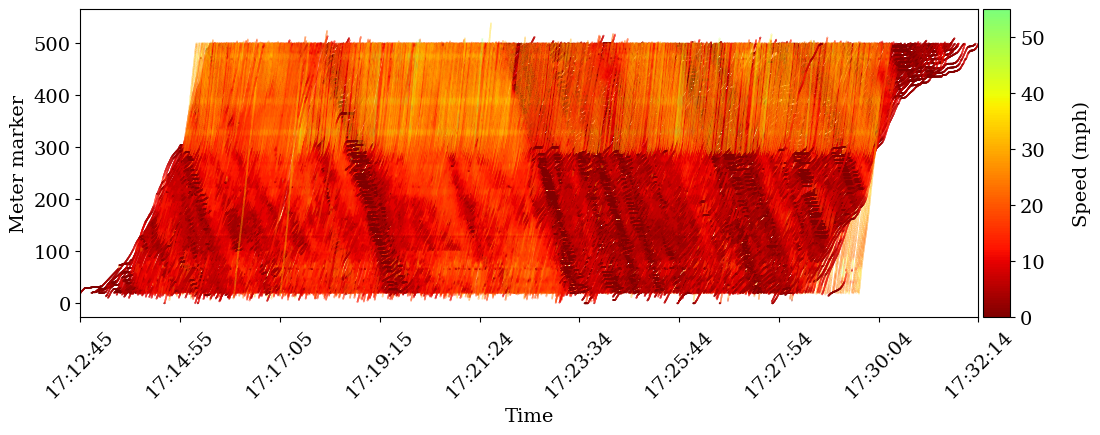

In [4]:
input_file = 'trajectories-0515-0530.json'

# Set environment
fig, ax, cmap, cax = setup_plot()

# 读取并处理JSON文件
t = time.time()
i = 0
all_timestamps = []  # 用于收集所有时间戳
with open(input_file, 'r') as input_file:
    for line in input_file:
        record = json.loads(line)
        im = plot_trajectory(record, ax, cmap, cax, all_timestamps)
        i += 1
        if i % 200 == 0:
            print(f"Plotted {i} trajectories")
        if i >= 5000:  # 控制最大绘制轨迹数
            break

print(f"Elapsed: {time.time() - t}")

# 更新颜色条和坐标轴标签
plt.colorbar(im, cax=cax).set_label('Speed (mph)', rotation=90, labelpad=20)
ax.set_xlabel("Time")
ax.set_ylabel("Meter marker")

# 设置最小时间和最大时间
if all_timestamps:
    min_timestamp = min(all_timestamps)
    max_timestamp = max(all_timestamps)
    ax.set_xlim([min_timestamp, max_timestamp])
    
    # 将时间分成若干段
    num_ticks = 10  # 假设需要10个刻度
    ticks = np.linspace(min_timestamp, max_timestamp, num_ticks)
    ax.set_xticks(ticks)
    
    # 更新x轴时间为可读格式
    x_datetime = [datetime.datetime.fromtimestamp(ts) for ts in ticks]
    labels = [d.strftime('%H:%M:%S') for d in x_datetime]
    ax.set_xticklabels(labels, rotation=45)
                


plt.show()